In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
import pandas as pd
import cv2 as cv

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Input, Flatten , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
# degerleri 0-1 sikistirildi
x_train = x_train.astype('float32')/255
x_test= x_test.astype('float32')/255
# bunu neden yapiyoruz anlamadim ?
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [6]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [7]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
earlyStoping = EarlyStopping(monitor='loss', mode= 'min', verbose=1, patience= 5)

In [10]:
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()),
model.add(Dropout(0.5))
model.add(Dense(10 ,activation='softmax'))




In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [12]:
model.compile(loss='categorical_crossentropy' , optimizer = 'adam',metrics=['accuracy']  )

In [13]:
model.fit(x_train, y_train ,callbacks=earlyStoping, batch_size=128 ,epochs=20, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 18s 42ms/step - loss: 0.3697 - accuracy: 0.8876 - val_loss: 0.0857 - val_accuracy: 0.9785
Epoch 2/20
422/422 [==============================] - 18s 42ms/step - loss: 0.1116 - accuracy: 0.9656 - val_loss: 0.0564 - val_accuracy: 0.9850
Epoch 3/20
422/422 [==============================] - 17s 41ms/step - loss: 0.0847 - accuracy: 0.9743 - val_loss: 0.0531 - val_accuracy: 0.9860
Epoch 4/20
422/422 [==============================] - 18s 42ms/step - loss: 0.0721 - accuracy: 0.9780 - val_loss: 0.0449 - val_accuracy: 0.9870
Epoch 5/20
422/422 [==============================] - 18s 43ms/step - loss: 0.0625 - accuracy: 0.9808 - val_loss: 0.0400 - val_accuracy: 0.9898
Epoch 6/20
422/422 [==============================] - 19s 44ms/step - loss: 0.0577 - accuracy: 0.9825 - val_loss: 0.0389 - val_accuracy: 0.9892
Epoch 7/20
422/422 [==============================] - 19s 45ms/step - loss: 0.0535 - accuracy: 0.9836 - val_loss: 0.0349 - val_accuracy:

In [14]:
lossHis = pd.DataFrame(model.history.history)

<AxesSubplot:>

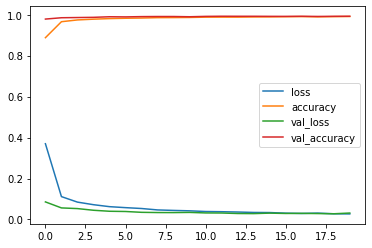

In [15]:
lossHis.plot()

In [76]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.021739060059189796
Test accuracy: 0.9925000071525574


In [125]:
#real life example

def example():
    img = cv.imread('user_input.jpg',0)
    img = cv.bitwise_not(img)
    img =cv.resize(img, (28,28))
    plt.imshow(img , cmap='gray')
    plt.show()
    img = np.expand_dims(img, -1)
    img = np.expand_dims(img, 0)
    print(img.shape)
    pre =model.predict(img)
    pre = pd.DataFrame(pre)
    pre.iloc[0].plot(kind='bar')
    cv.waitKey(0)
    cv.destroyAllWindows()

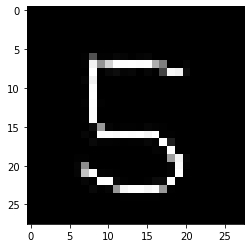

(1, 28, 28, 1)


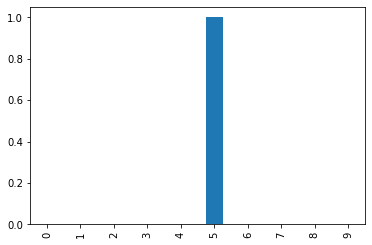

In [126]:
example()